In [1]:
import pandas as pd
import numpy as np

In [3]:
affair = pd.read_csv("D:/DATA SCIENCE/ExcelR/Assignments/Logistic Regression/affairs.csv")


In [4]:
affair.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,0,male,37.0,10.00,no,3,18,7,4
1,0,female,27.0,4.00,no,4,14,6,4
2,0,female,32.0,15.00,yes,1,12,1,4
3,0,male,57.0,15.00,yes,5,18,6,5
4,0,male,22.0,0.75,no,2,17,6,3


In [6]:
affair["affair_yn"] = 0

In [8]:
affair.loc[affair.affairs != 0, "affair_yn"] = 1

In [9]:
affair.head(10)

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,affair_yn
0,0,male,37.0,10.00,no,3,18,7,4,0
1,0,female,27.0,4.00,no,4,14,6,4,0
2,0,female,32.0,15.00,yes,1,12,1,4,0
3,0,male,57.0,15.00,yes,5,18,6,5,0
4,0,male,22.0,0.75,no,2,17,6,3,0
5,0,female,32.0,1.50,no,2,17,5,5,0
6,0,female,22.0,0.75,no,2,12,1,3,0
7,0,male,57.0,15.00,yes,2,14,4,4,0
8,0,female,32.0,15.00,yes,4,16,1,2,0
9,0,male,22.0,1.50,no,4,14,4,5,0


In [10]:
affair["gender"].replace({'female':0, 'male':1}, inplace = True)

In [11]:
affair["children"].replace({'no':0 ,'yes':1}, inplace = True)

In [12]:
affair.head()

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,affair_yn
0,0,1,37.0,10.00,0,3,18,7,4,0
1,0,0,27.0,4.00,0,4,14,6,4,0
2,0,0,32.0,15.00,1,1,12,1,4,0
3,0,1,57.0,15.00,1,5,18,6,5,0
4,0,1,22.0,0.75,0,2,17,6,3,0


for visulaization we import 

In [13]:
import matplotlib.pyplot as plt

In [15]:
import seaborn as sb

In [16]:
from sklearn.linear_model import LogisticRegression # to perform logistic regression 

In [20]:
from sklearn.model_selection import train_test_split # spliting the data into train and test

to make confusion matrix


In [23]:
from sklearn import metrics

In [26]:
from sklearn import preprocessing

In [27]:
from sklearn.metrics import classification_report

In [29]:
affair.columns

Index(['affairs', 'gender', 'age', 'yearsmarried', 'children', 'religiousness',
       'education', 'occupation', 'rating', 'affair_yn'],
      dtype='object')

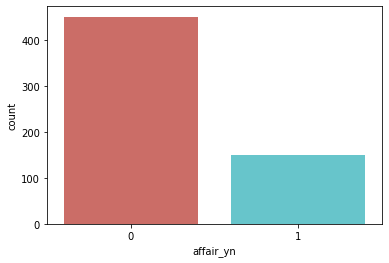

In [30]:
sb.countplot(x = "affair_yn", data = affair, palette = "hls" )

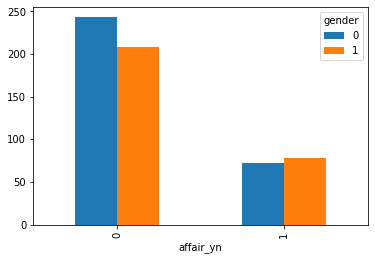

In [31]:
pd.crosstab(affair.affair_yn, affair.gender).plot(kind = "bar")

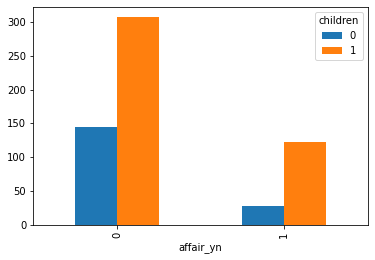

In [33]:
pd.crosstab(affair.affair_yn, affair.children).plot(kind="bar")

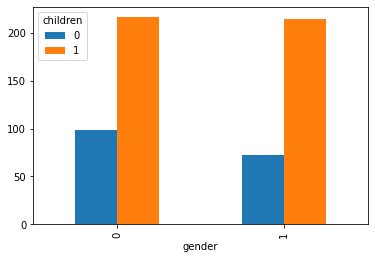

In [34]:
pd.crosstab(affair.gender, affair.children).plot(kind ="bar")

In [40]:
affair.shape

(601, 10)

In [41]:
x = affair.iloc[:,1:9]
x

,gender,age,yearsmarried,children,religiousness,education,occupation,rating
0,1,37.0,10.00,0,3,18,7,4
1,0,27.0,4.00,0,4,14,6,4
2,0,32.0,15.00,1,1,12,1,4
3,1,57.0,15.00,1,5,18,6,5
4,1,22.0,0.75,0,2,17,6,3
...,...,...,...,...,...,...,...,...
596,1,22.0,1.50,1,1,12,2,5
597,0,32.0,10.00,1,2,18,5,4
598,1,32.0,10.00,1,2,17,6,5
599,1,22.0,7.00,1,3,18,6,2


In [45]:
y = affair.iloc[:,9]
y

0      0
1      0
2      0
3      0
4      0
      ..
596    1
597    1
598    1
599    1
600    1
Name: affair_yn, Length: 601, dtype: int64

In [46]:
from sklearn.linear_model import LogisticRegression


In [47]:
classifier = LogisticRegression()

In [48]:
classifier.fit(x,y)

C:\Users\Suresh Goud\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [49]:
classifier.coef_ # coefficients of features

array([[ 0.23157338, -0.03912529,  0.09022309,  0.40068925, -0.30529637,
         0.04444024,  0.02616277, -0.44645044]])

In [59]:
classifier.predict_proba(x) # porbability values

array([[0.7803415 , 0.2196585 ],
       [0.89646381, 0.10353619],
       [0.56582203, 0.43417797],
       ...,
       [0.70746398, 0.29253602],
       [0.42165579, 0.57834421],
       [0.77434108, 0.22565892]])

In [65]:
y_pred = classifier.predict(x)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [61]:
affair["y_pred"] = y_pred

In [66]:
y_prob = pd.DataFrame(classifier.predict_proba(x.iloc[:,:]))
y_prob

,0,1
0,0.780341,0.219659
1,0.896464,0.103536
2,0.565822,0.434178
3,0.907339,0.092661
4,0.697242,0.302758
...,...,...
596,0.782501,0.217499
597,0.656998,0.343002
598,0.707464,0.292536
599,0.421656,0.578344


In [68]:
new_df = pd.concat([affair, y_prob], axis = 1)
new_df

,affairs,gender,age,yearsmarried,children,religiousness,education,occupation,rating,affair_yn,y_pred,0,1
0,0,1,37.0,10.00,0,3,18,7,4,0,0,0.780341,0.219659
1,0,0,27.0,4.00,0,4,14,6,4,0,0,0.896464,0.103536
2,0,0,32.0,15.00,1,1,12,1,4,0,0,0.565822,0.434178
3,0,1,57.0,15.00,1,5,18,6,5,0,0,0.907339,0.092661
4,0,1,22.0,0.75,0,2,17,6,3,0,0,0.697242,0.302758
...,...,...,...,...,...,...,...,...,...,...,...,...,...
596,1,1,22.0,1.50,1,1,12,2,5,1,0,0.782501,0.217499
597,7,0,32.0,10.00,1,2,18,5,4,1,0,0.656998,0.343002
598,2,1,32.0,10.00,1,2,17,6,5,1,0,0.707464,0.292536
599,2,1,22.0,7.00,1,3,18,6,2,1,1,0.421656,0.578344


In [70]:
from sklearn.metrics import confusion_matrix

In [73]:
confusion = confusion_matrix(y,y_pred)
confusion

array([[437,  14],
       [130,  20]], dtype=int64)

In [74]:
print(confusion)

[[437  14]
 [130  20]]


In [75]:
type(y_pred)

numpy.ndarray

In [77]:
accuracy = sum(y == y_pred)/affair.shape[0]

In [78]:
accuracy

0.7603993344425957

In [79]:
pd.crosstab(y_pred, y)

affair_yn,0,1
row_0,,
0,437,130
1,14,20
